# *__Flower classification__*

###PROBLEM STATEMENT


The objective of this project is to use different Machine Learning classifiers. The dataset is sourced from Kaggle and contains 14 types of flower images, including 13618 training images and 98 validation images.


###**INTRODUCTION**



In the realm of Machine Learning, image classification has emerged as a fascinating study area. The ability to accurately categorize images into specific classes can have far-reaching implications, from aiding in medical diagnoses to powering visual search engines. This project aims to delve into this captivating domain by employing various Machine Learning classifiers to categorize images of flowers.

The dataset for this project, sourced from Kaggle, is a rich collection of 14 different types of flower images. It comprises a substantial set of 13,618 training images, that are used to train our classifiers. Additionally, a set of 98 validation images is included to evaluate the performance of our models and ensure their ability to generalize beyond the training data.
Through this project, we aspire to explore the strengths and weaknesses of different Machine Learning classifiers when applied to image classification tasks. By doing so, we hope to gain valuable insights and contribute to the ongoing advancements in Machine Learning.


### Steps

1. Import Necessary Libraries and the dataset to the Google Collab

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!git clone https://github.com/Avi-Bane/Datasets.git
%ls


Cloning into 'Datasets'...
remote: Enumerating objects: 13757, done.
remote: Total 13757 (delta 0), reused 0 (delta 0), pack-reused 13757
Receiving objects: 100% (13757/13757), 202.49 MiB | 19.71 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (13745/13745), done.
Datasets/  drive/  sample_data/


2. Load the training and validation dataset and show the first few lines.

In [2]:
# Load the dataset
train_file_path = '/content/Datasets/Flower/train.csv'
validate_file_path = '/content/Datasets/Flower/val.csv'
train_data = pd.read_csv(train_file_path)
validate_data = pd.read_csv(validate_file_path)
print(train_data.head())
print(validate_data.head())

                                     image:FILE  category
0   train/carnation/6838762136_f8254d6a1a_c.jpg         0
1   train/carnation/3540544866_823aee81af_c.jpg         0
2  train/carnation/50034862576_b0f55b7b3b_c.jpg         0
3  train/carnation/26770795691_f662e47143_c.jpg         0
4  train/carnation/18224456534_2f75191d85_c.jpg         0
                                   image:FILE  category
0  val/carnation/51286244394_853e894860_c.jpg         0
1  val/carnation/16915050250_4bae79aa6d_c.jpg         0
2    val/carnation/364467920_420ddab32e_c.jpg         0
3    val/carnation/213392504_2eaf4f8816_c.jpg         0
4   val/carnation/3315280754_132d0f2161_c.jpg         0


In [3]:
# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Extract the train image file paths and categories
train_image_files = train_data['image:FILE'].values
train_categories = train_data['category'].values

# Extract the validation image file paths and categories
validate_image_files = validate_data['image:FILE'].values
validate_categories = validate_data['category'].values

# Create a DataFrame for the TrainImageDataGenerator
tdf = pd.DataFrame({
    'trainfilename': train_image_files,
    # Convert training_categories to strings
    'trainclass': train_categories.astype(str)
})
# Create a DataFrame for the ValidationImageDataGenerator
vdf = pd.DataFrame({
    'valfilename': validate_image_files,
    # Convert validation_categories to strings
    'valclass': validate_categories.astype(str)
})


# Define the data generator with preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,         # Normalize pixel values to [0, 1]
)

# Create training and validation generators
train_generator = datagen.flow_from_dataframe(
    tdf,
    directory='/content/Datasets/Flower/',              # Directory where images are stored
    x_col='trainfilename',
    y_col='trainclass',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

validation_generator = datagen.flow_from_dataframe(
    vdf,
    directory='/content/Datasets/Flower/',              # Directory where images are stored
    x_col='valfilename',
    y_col='valclass',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 13642 validated image filenames belonging to 14 classes.
Found 98 validated image filenames belonging to 14 classes.


In [4]:
#Define a CNN architecture suitable for image classification.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10  # Set the number of epochs for training
history = model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // batch_size),  # Ensure steps_per_epoch is at least 1
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=max(1, validation_generator.samples // batch_size)  # Ensure validation_steps is at least 1
)


Epoch 1/10
426/426 [==============================] - 44s 84ms/step - loss: 1.6265 - accuracy: 0.4507 - val_loss: 1.3209 - val_accuracy: 0.5000
Epoch 2/10
426/426 [==============================] - 29s 69ms/step - loss: 1.0151 - accuracy: 0.6522 - val_loss: 1.0777 - val_accuracy: 0.6042
Epoch 3/10
426/426 [==============================] - 30s 69ms/step - loss: 0.6176 - accuracy: 0.7855 - val_loss: 1.1076 - val_accuracy: 0.6771
Epoch 4/10
426/426 [==============================] - 29s 68ms/step - loss: 0.2944 - accuracy: 0.8998 - val_loss: 1.4093 - val_accuracy: 0.6562
Epoch 5/10
426/426 [==============================] - 31s 72ms/step - loss: 0.1452 - accuracy: 0.9528 - val_loss: 1.7014 - val_accuracy: 0.6354
Epoch 6/10
426/426 [==============================] - 30s 70ms/step - loss: 0.1024 - accuracy: 0.9680 - val_loss: 1.8317 - val_accuracy: 0.6979
Epoch 7/10
426/426 [==============================] - 32s 74ms/step - loss: 0.0772 - accuracy: 0.9752 - val_loss: 2.1909 - val_accuracy:

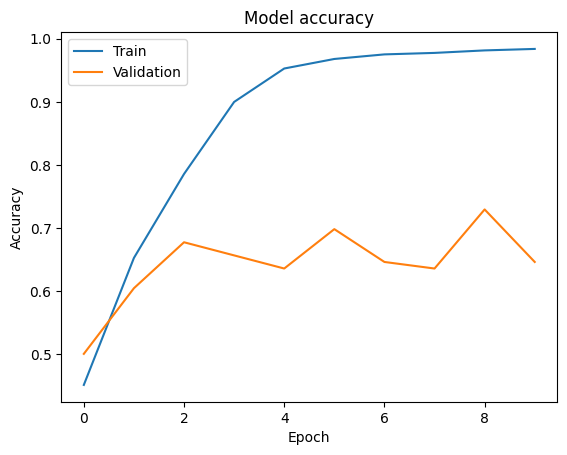

In [6]:
#  plot training and validation accuracy

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [7]:
# prompt: now use a SVM to classify the images

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# # *__Flower classification__*
#
# ###PROBLEM STATEMENT
#

# ... (Previous code remains the same) ...

# Extract features from the CNN model
def extract_features(model, generator):
  """Extracts features from the given model and generator."""
  features = model.predict(generator)
  labels = np.array(generator.classes)
  return features, labels

# Extract features from the training and validation sets
train_features, train_labels = extract_features(model, train_generator)
val_features, val_labels = extract_features(model, validation_generator)

# Flatten the features
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

# Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)

# Train the SVM classifier
svm = SVC(kernel='linear', C=1)
svm.fit(train_features, train_labels_encoded)

# Predict on the validation set
predictions = svm.predict(val_features)

# Evaluate the SVM model
accuracy = accuracy_score(val_labels_encoded, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(val_labels_encoded, predictions))


4/4 [==============================] - 0s 119ms/step
Accuracy: 0.061224489795918366
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         7
           3       0.06      0.14      0.09         7
           4       0.09      0.14      0.11         7
           5       0.25      0.29      0.27         7
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         7
          12       0.08      0.14      0.11         7
          13       0.04      0.14      0.06         7

    accuracy                           0.06        98
   macro avg       0.04      0.06      0.05       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


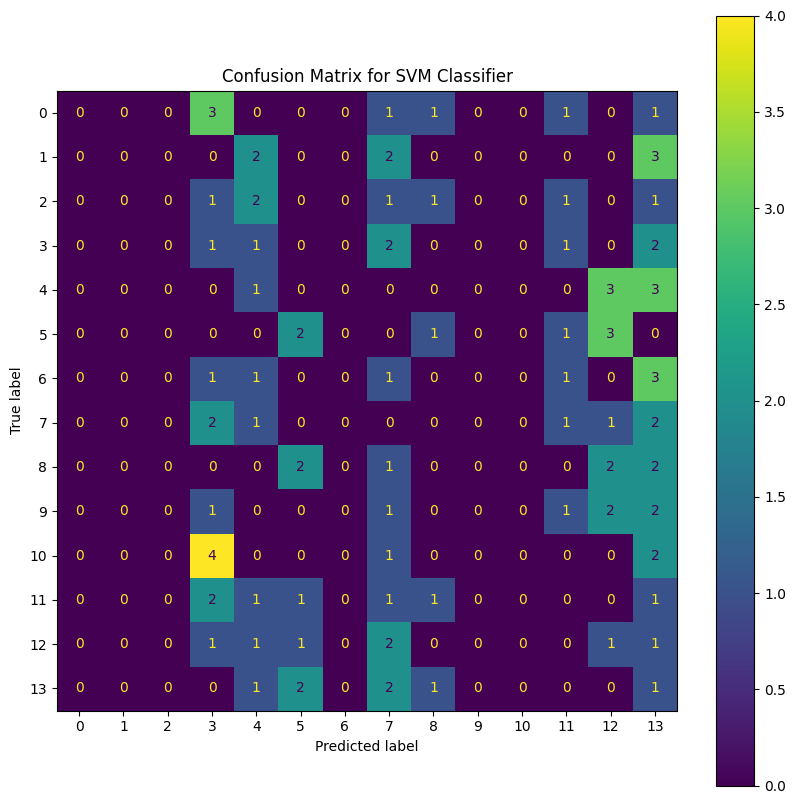

In [8]:
# prompt: plot the accuracy of SVM classifiers

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(val_labels_encoded, predictions)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='viridis')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


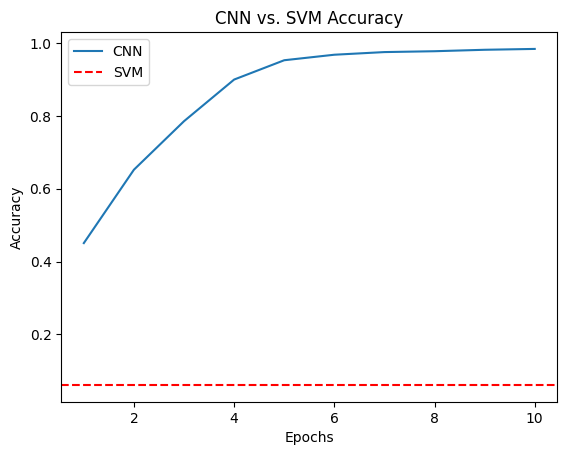

In [9]:
# prompt: plot the svm classifier and cnn classifiers accuracy

import matplotlib.pyplot as plt

# Assuming you have the accuracy values from your CNN and SVM models
cnn_accuracy = history.history['accuracy']  # Replace with your CNN accuracy values
svm_accuracy = accuracy  # Replace with your SVM accuracy value

# Create a list of epochs for the CNN
epochs = range(1, len(cnn_accuracy) + 1)

# Plot the accuracy curves
plt.plot(epochs, cnn_accuracy, label='CNN')
plt.axhline(y=svm_accuracy, color='r', linestyle='--', label='SVM')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN vs. SVM Accuracy')
plt.legend()

# Display the plot
plt.show()
